In [51]:
# Types of Naive Bayes 
# Bernoulli Naive Bayes  - If majority of independent variables Binary
# Multinomial Naive Bayes - If dependent variable has more than  2 levels
# Gaussian Naive Bayes - If majority of independent Variables Numerical

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Hackathon/H1N1 Vaccine Prediction'

/Users/rajeshprabhakarkaila/Desktop/Hackathon/H1N1 Vaccine Prediction


In [54]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [55]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [56]:
vaccinelabels=pd.read_csv("training_set_labels.csv")

In [57]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [58]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [59]:
vaccinetrain['data']='train'
vaccinetest['data']='test'

In [60]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [61]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
original=combinedf

In [64]:
mask = combinedf.isnull()

In [65]:
combinedf = combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [66]:
combinedf=combinedf.where(~mask, original)

In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [68]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",
                        max_iter=20)

In [69]:
combinedf1=combinedf.drop(['respondent_id','data'],axis=1)

In [70]:
combinedf1_impute=imputer.fit_transform(combinedf1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [71]:
combinedf1_impute=pd.DataFrame(combinedf1_impute,
                               columns=combinedf1.columns)

In [72]:
combinedf1_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

<AxesSubplot:>

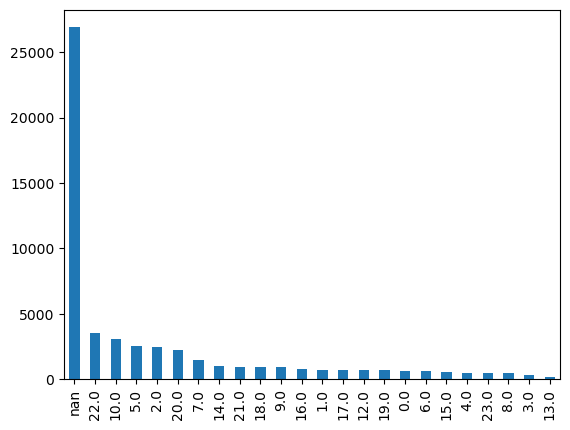

In [73]:
combinedf.employment_occupation.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:>

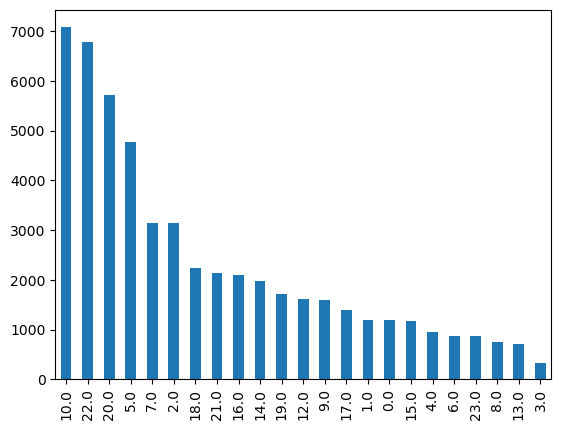

In [74]:
combinedf1_impute.employment_occupation.value_counts(
    dropna=False).plot(kind='bar')

In [75]:
vaccinetrain.education.value_counts(dropna=False)

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
NaN                  1407
Name: education, dtype: int64

In [77]:
combinedf1_impute=combinedf1_impute.reset_index()

In [78]:
combinedf=combinedf.reset_index()

In [79]:
combinedf1_impute['data']=combinedf.data

In [85]:
vaccinetraindf=combinedf1_impute[combinedf1_impute.data==1]
vaccinetestdf=combinedf1_impute[combinedf1_impute.data==0]

In [87]:
print(vaccinetraindf.shape)
print(vaccinetestdf.shape)

(26707, 37)
(26708, 37)


In [89]:
vaccinetraindf=vaccinetraindf.drop(['index','data'],axis=1)

In [90]:
vaccinetestdf=vaccinetestdf.drop(['index','data'],axis=1)

In [91]:
# Seasonal Vaccine Prediction
y=vaccinelabels.seasonal_vaccine
X=vaccinetraindf

<AxesSubplot:>

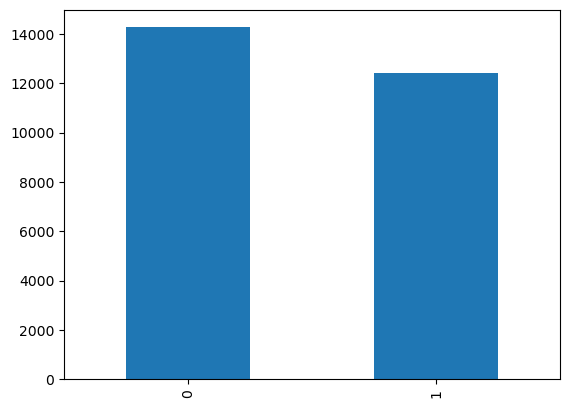

In [93]:
y.value_counts().plot(kind='bar') # Balanced Data

<AxesSubplot:>

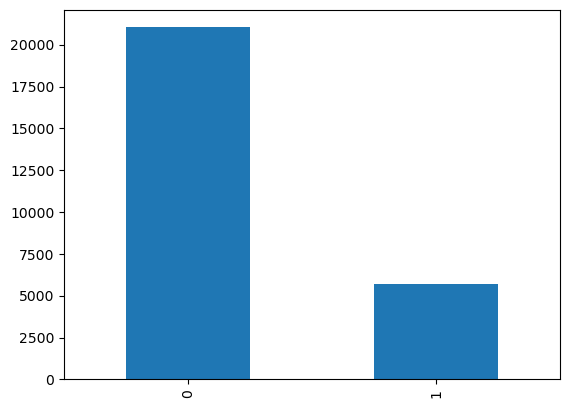

In [94]:
vaccinelabels.h1n1_vaccine.value_counts().plot(kind='bar') # Imbalance Data

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

In [98]:
logit=LogisticRegression(max_iter=1000)

In [99]:
logitmodel=logit.fit(X,y)

In [101]:
logitmodel.score(X,y)

0.7732804133747707

In [102]:
logitpredict=logitmodel.predict(X)

In [105]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



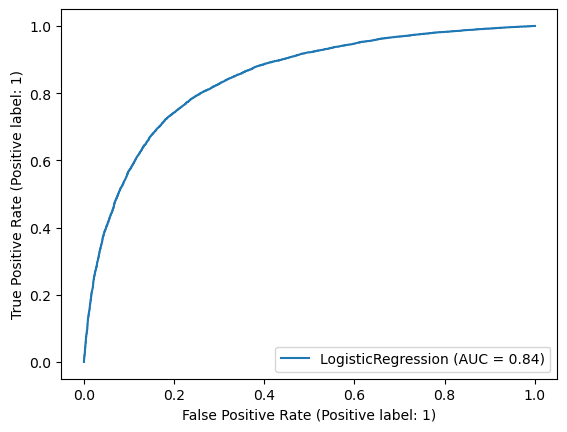

In [106]:
RocCurveDisplay.from_estimator(logit,X,y)

In [119]:
logith1n1=logit.fit(X,vaccinelabels.h1n1_vaccine)

In [120]:
logith1n1.score(X,vaccinelabels.h1n1_vaccine)

0.830119444340435

In [121]:
logith1n1predict=logith1n1.predict(X)

In [122]:
print(classification_report(vaccinelabels.h1n1_vaccine,logith1n1predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.67      0.70     26707
weighted avg       0.81      0.83      0.81     26707



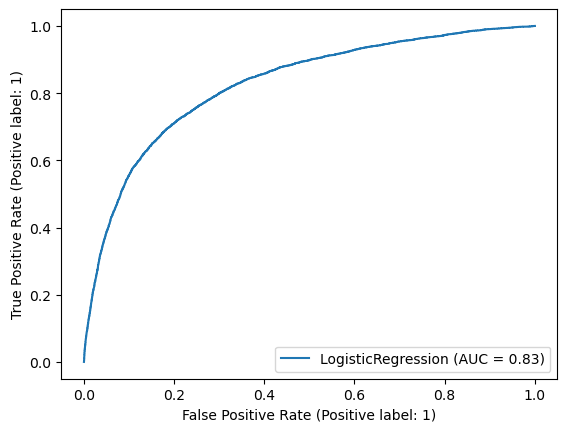

In [112]:
RocCurveDisplay.from_estimator(logit,X,vaccinelabels.h1n1_vaccine)

In [129]:
logitseason=logitmodel.predict_proba(vaccinetestdf)

In [130]:
logith1n1pred=logith1n1.predict_proba(vaccinetestdf)

In [131]:
pd.DataFrame(logitseason).to_csv("logit_season.csv")

In [132]:
pd.DataFrame(logith1n1pred).to_csv("logith1n1.csv")

In [ ]:
# MICE Algorithm - Multivariate Imputation using Chained Equations

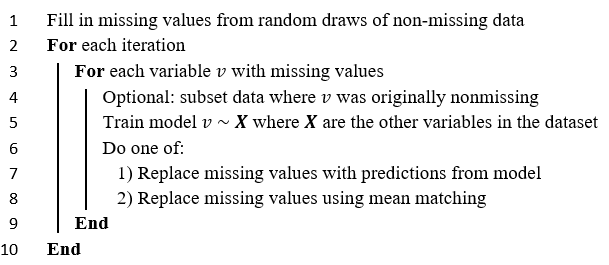